# Importing Libraries 

In [136]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn import metrics

### Loading Dataset

In [137]:
df = pd.read_csv('dataset.csv')

In [138]:
df_dup = df
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Basic Exploration

In [139]:
df.shape

(550068, 12)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [141]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


## Preprocessing

In [142]:
print(df.isna().sum(),'\n\n','Percentage :',df.isna().sum()/df.shape[0]*100)

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64 

 Percentage : User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64


In [143]:
print(df.Product_Category_2.unique())

[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]


In [144]:
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [145]:
df['Product_Category_2'].fillna(8,inplace=True)

In [146]:
df.drop('Product_Category_3',axis=1,inplace=True)

In [147]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [148]:
df['User_ID'].dtype

dtype('int64')

In [149]:
for i in df.columns :
    if df[i].dtype == 'object' :
        print(df[i].value_counts())

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64
M    414259
F    135809
Name: Gender, dtype: int64
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


In [150]:
df.drop('Product_ID',axis=1, inplace = True)

In [151]:
df.drop('User_ID',axis=1, inplace = True)

In [152]:
df['Gender'].replace({'F':0,'M':1},inplace=True)

In [153]:
df['Age'].replace({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':5},inplace=True)

In [154]:
df['Stay_In_Current_City_Years'].replace({'4+':4},inplace=True)

In [155]:
dummies = pd.get_dummies(df['City_Category'],prefix='City',drop_first=True)

In [156]:
df = pd.concat([df,dummies],axis=1)

In [157]:
df.drop('City_Category',axis=1,inplace=True)

In [158]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_B,City_C
0,0,0,10,2,0,3,8.0,8370,0,0
1,0,0,10,2,0,1,6.0,15200,0,0
2,0,0,10,2,0,12,8.0,1422,0,0
3,0,0,10,2,0,12,14.0,1057,0,0
4,1,5,16,4,0,8,8.0,7969,0,1


## EDA

<AxesSubplot: xlabel='Gender', ylabel='count'>

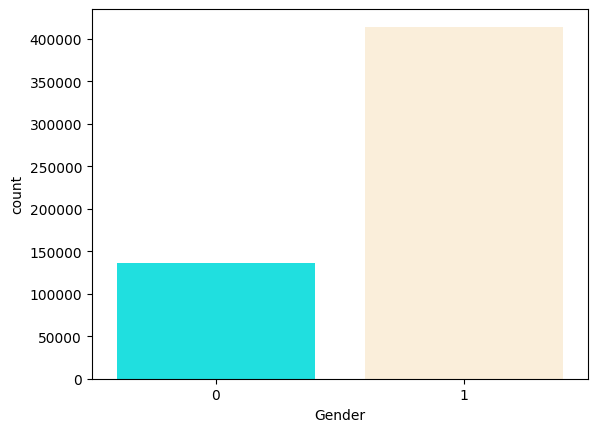

In [159]:
pal = ['#00FFFF','#FFEFD5', '#AAA','#00FF33']
sns.countplot(data=df, x='Gender', palette= pal)

<AxesSubplot: xlabel='Age', ylabel='count'>

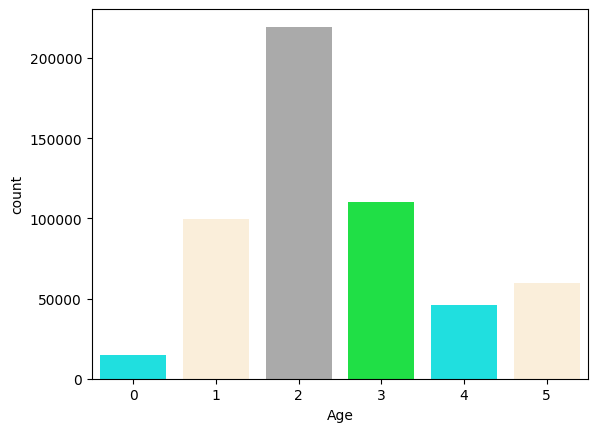

In [160]:
sns.countplot(data=df, x='Age', palette= pal)


<AxesSubplot: xlabel='Occupation', ylabel='Count'>

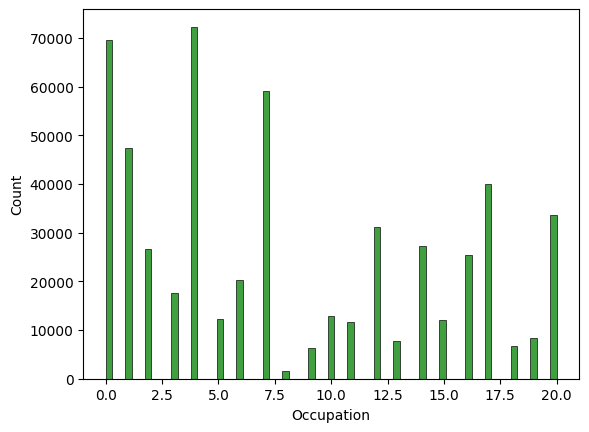

In [161]:
sns.histplot(df['Occupation'],color='g')

<AxesSubplot: xlabel='Stay_In_Current_City_Years', ylabel='count'>

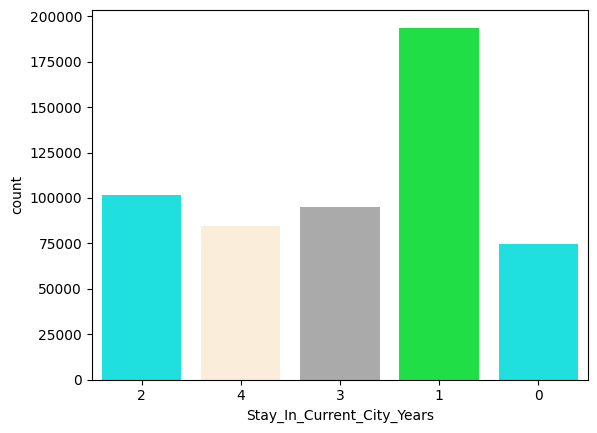

In [162]:
sns.countplot(data=df, x='Stay_In_Current_City_Years', palette= pal)

<AxesSubplot: xlabel='Marital_Status', ylabel='count'>

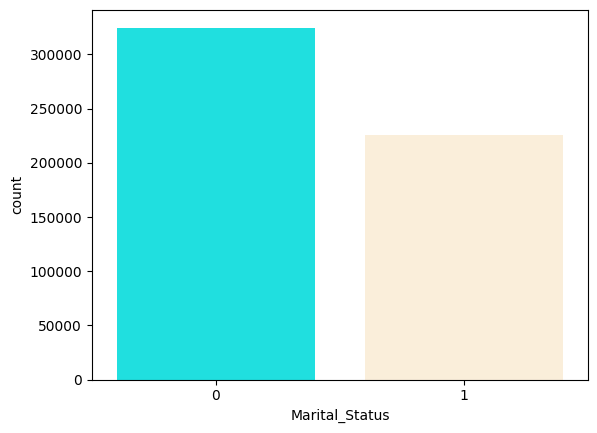

In [163]:
sns.countplot(data=df, x='Marital_Status', palette= pal)

<AxesSubplot: xlabel='Product_Category_1', ylabel='Count'>

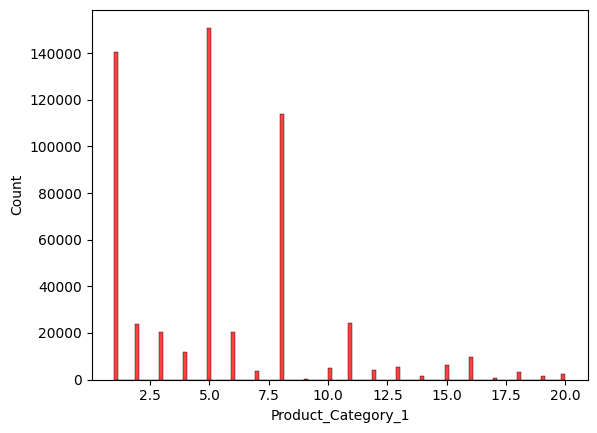

In [164]:
sns.histplot(df['Product_Category_1'],color='r')

Text(0.5, 0, 'City wise customers')

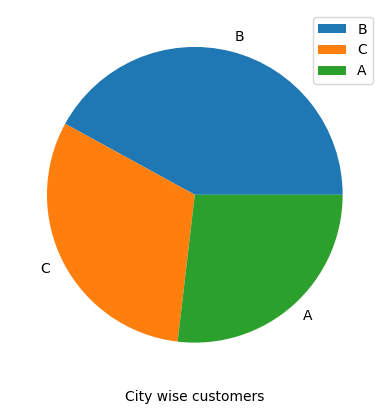

In [165]:
labels = 'B','C','A'
plt.pie(df_dup['City_Category'].value_counts(),labels=labels)
plt.legend( loc="best")
plt.xlabel('City wise customers')

#### Modeling

In [166]:
x = df.drop('Purchase',axis=1)
y = df['Purchase']

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [168]:
modellr = LinearRegression()
modeldtr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelbr = BayesianRidge()
modelgbr=  GradientBoostingRegressor()

MM = [modellr,modeldtr,modelrfr,modelbr,modelgbr]

In [169]:
for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3)) 
    print('------------------------------------------------------')

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 3602.668
------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 2246.13
------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 2189.312
------------------------------------------------------
Model Name:  BayesianRidge()
Mean Absolute Error (MAE): 3602.64
------------------------------------------------------
Model Name:  GradientBoostingRegressor()
Mean Absolute Error (MAE): 2263.431
------------------------------------------------------


In [170]:
modelrfr.fit(x_train, y_train)

RandomForestRegressor()

In [172]:
preds = modelrfr.predict(x_test)

In [173]:
preds = pd.DataFrame(preds).round()
ytst= y_test.reset_index(drop=True)

In [174]:
preds

,0
0,15948.0
1,7096.0
2,16658.0
3,1578.0
4,14258.0
...,...
110009,15658.0
110010,13693.0
110011,15486.0
110012,6429.0


In [175]:
dfr = pd.concat([ytst, preds],axis=1)

In [176]:
dfr

,Purchase,0
0,16383,15948.0
1,8051,7096.0
2,15349,16658.0
3,715,1578.0
4,15642,14258.0
...,...,...
110009,8140,15658.0
110010,11458,13693.0
110011,20157,15486.0
110012,7113,6429.0


In [177]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))

MAE: 2188.703401385278
